Importing the libraries

In [2]:
import pandas as pd
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt

Reading the CSV file

In [3]:
f = pd.read_csv("h1b_kaggle.csv")
del f['Unnamed: 0']
len(f)

3002458

In [4]:
f = f.dropna()
f.reset_index()
f

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.00,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.00,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.00,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.00,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.40,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
5,CERTIFIED-WITHDRAWN,BURGER KING CORPORATION,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.00,2016.0,"MIAMI, FLORIDA",-80.191790,25.761680
6,CERTIFIED-WITHDRAWN,BT AND MK ENERGY AND COMMODITIES,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,91021.00,2016.0,"HOUSTON, TEXAS",-95.369803,29.760427
7,CERTIFIED-WITHDRAWN,"GLOBO MOBILE TECHNOLOGIES, INC.",CHIEF EXECUTIVES,CHIEF OPERATIONS OFFICER,Y,150000.00,2016.0,"SAN JOSE, CALIFORNIA",-121.886329,37.338208
9,WITHDRAWN,LESSARD INTERNATIONAL LLC,CHIEF EXECUTIVES,PRESIDENT,Y,154648.00,2016.0,"VIENNA, VIRGINIA",-77.265260,38.901222
10,CERTIFIED-WITHDRAWN,H.J. HEINZ COMPANY,CHIEF EXECUTIVES,"CHIEF INFORMATION OFFICER, HEINZ NORTH AMERICA",Y,182978.00,2016.0,"PITTSBURGH, PENNSYLVANIA",-79.995886,40.440625


The top employers

In [5]:
f.EMPLOYER_NAME.value_counts().head(20)

INFOSYS LIMITED                                    130257
TATA CONSULTANCY SERVICES LIMITED                   64273
WIPRO LIMITED                                       45673
DELOITTE CONSULTING LLP                             35999
IBM INDIA PRIVATE LIMITED                           33585
ACCENTURE LLP                                       33226
MICROSOFT CORPORATION                               25551
HCL AMERICA, INC.                                   22488
ERNST & YOUNG U.S. LLP                              18094
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17322
CAPGEMINI AMERICA INC                               16628
GOOGLE INC.                                         16425
LARSEN & TOUBRO INFOTECH LIMITED                    14318
IGATE TECHNOLOGIES INC.                             12327
IBM CORPORATION                                     11976
INTEL CORPORATION                                   11390
TECH MAHINDRA (AMERICAS),INC.                       10595
DELOITTE & TOU

In [ ]:
Plotting the graph of the Top Employers

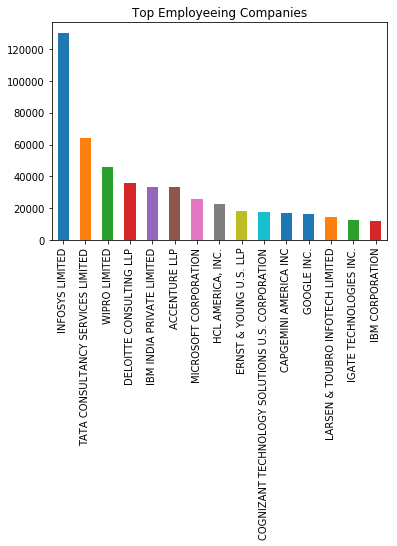

In [6]:
f['EMPLOYER_NAME'].value_counts().head(15).plot(kind='bar', title='Top Employeeing Companies')

In [7]:
f.PREVAILING_WAGE.value_counts().sort_values(ascending = False).head()

60000.0    10185
55245.0     6745
62566.0     6480
58053.0     5683
52499.0     5492
Name: PREVAILING_WAGE, dtype: int64

The mean of the prevailig wages

In [8]:
f.PREVAILING_WAGE.mean()

145166.64888402403

The employer with the highest wages

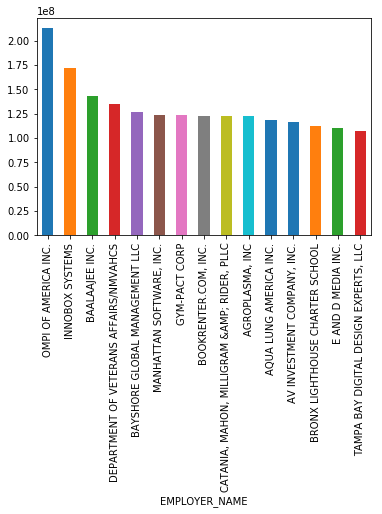

In [9]:
awp = f.groupby(['EMPLOYER_NAME'])['PREVAILING_WAGE'].mean().nlargest(15).plot(kind='bar')

Grouping people by their worksite

In [10]:
f['WORKSITE'].value_counts().head(20)

NEW YORK, NEW YORK            190863
HOUSTON, TEXAS                 83385
SAN FRANCISCO, CALIFORNIA      62457
ATLANTA, GEORGIA               52008
CHICAGO, ILLINOIS              51167
SAN JOSE, CALIFORNIA           49582
SUNNYVALE, CALIFORNIA          34968
DALLAS, TEXAS                  31509
BOSTON, MASSACHUSETTS          31336
REDMOND, WASHINGTON            30574
CHARLOTTE, NORTH CAROLINA      30176
IRVING, TEXAS                  29316
MOUNTAIN VIEW, CALIFORNIA      29245
SAN DIEGO, CALIFORNIA          28656
SANTA CLARA, CALIFORNIA        27945
JERSEY CITY, NEW JERSEY        26822
SEATTLE, WASHINGTON            26745
AUSTIN, TEXAS                  26695
LOS ANGELES, CALIFORNIA        26393
PHILADELPHIA, PENNSYLVANIA     24104
Name: WORKSITE, dtype: int64

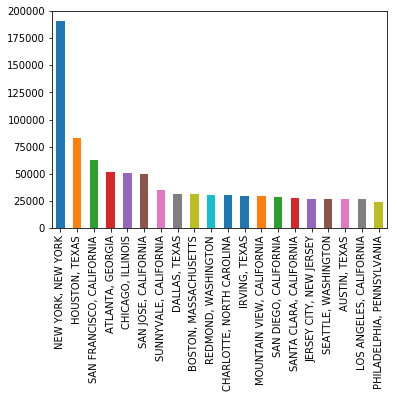

In [11]:
f['WORKSITE'].value_counts().head(20).plot(kind='bar')

The total number of different worksites

In [12]:
len(f['WORKSITE'].unique())

2487

Grouping all the worksites by the state in which they are located

In [13]:
f.loc[:, 'WORKSITE'] = f.loc[:, 'WORKSITE'].apply(lambda rec:rec.split(',')[1][1:])

def change_NA(rec):
    if rec == 'NA':
        return 'MARIANA ISLAND'
    return rec

f.loc[:, 'WORKSITE'] = f.loc[:, 'WORKSITE'].apply(lambda rec: change_NA(rec))
print(len(f['WORKSITE'].unique()))

53


Renaming the columns

In [14]:
f.rename(columns={'EMPLOYER_NAME': 'EMPLOYER', 'FULL_TIME_POSITION': 'FULL_T',
                 'PREVAILING_WAGE': 'PREV_WAGE', 'WORKSITE': 'STATE',
                 'lon': 'LON', 'lat': 'LAT'}, inplace = True)
columns_to_keep = ['CASE_STATUS', 'YEAR', 'STATE', 'SOC_NAME', 'JOB_TITLE',
                  'FULL_T', 'PREV_WAGE', 'EMPLOYER', 'LON', 'LAT']
f = f[columns_to_keep]
f.columns

Index(['CASE_STATUS', 'YEAR', 'STATE', 'SOC_NAME', 'JOB_TITLE', 'FULL_T',
       'PREV_WAGE', 'EMPLOYER', 'LON', 'LAT'],
      dtype='object')

Rounding of the latitute and longitude to 2 decimal places and changing year and wage from decimal to integer

In [15]:
f['LON'] = f['LON'].apply(lambda lon: float("%.2f" %lon))
f['LAT'] = f['LAT'].apply(lambda lat: float("%.2f" %lat))
f['YEAR'] = f['YEAR'].apply(lambda year:'%g' %(Decimal(str(year))))
f['PREV_WAGE'] = f['PREV_WAGE'].apply(lambda wage:'%g' %(Decimal(str(wage))))
f.head(10)

,CASE_STATUS,YEAR,STATE,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
0,CERTIFIED-WITHDRAWN,2016,MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067,UNIVERSITY OF MICHIGAN,-83.74,42.28
1,CERTIFIED-WITHDRAWN,2016,TEXAS,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674,"GOODMAN NETWORKS, INC.",-96.70,33.02
2,CERTIFIED-WITHDRAWN,2016,NEW JERSEY,CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066,"PORTS AMERICA GROUP, INC.",-74.08,40.73
3,CERTIFIED-WITHDRAWN,2016,COLORADO,CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",-104.99,39.74
4,WITHDRAWN,2016,MISSOURI,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518,PEABODY INVESTMENTS CORP.,-90.20,38.63
5,CERTIFIED-WITHDRAWN,2016,FLORIDA,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000,BURGER KING CORPORATION,-80.19,25.76
6,CERTIFIED-WITHDRAWN,2016,TEXAS,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,91021,BT AND MK ENERGY AND COMMODITIES,-95.37,29.76
7,CERTIFIED-WITHDRAWN,2016,CALIFORNIA,CHIEF EXECUTIVES,CHIEF OPERATIONS OFFICER,Y,150000,"GLOBO MOBILE TECHNOLOGIES, INC.",-121.89,37.34
9,WITHDRAWN,2016,VIRGINIA,CHIEF EXECUTIVES,PRESIDENT,Y,154648,LESSARD INTERNATIONAL LLC,-77.27,38.90
10,CERTIFIED-WITHDRAWN,2016,PENNSYLVANIA,CHIEF EXECUTIVES,"CHIEF INFORMATION OFFICER, HEINZ NORTH AMERICA",Y,182978,H.J. HEINZ COMPANY,-80.00,40.44


Finding all the unique values in a column

In [16]:
f['CASE_STATUS'].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'], dtype=object)

Counting the nummber of unique values in a column

In [17]:
f['EMPLOYER'].nunique()

214982

Replacing each of the values in a column with an unique integer

In [18]:
f['STATE'] = pd.factorize(f.STATE)[0] + 1
f.head(10)

,CASE_STATUS,YEAR,STATE,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
0,CERTIFIED-WITHDRAWN,2016,1,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067,UNIVERSITY OF MICHIGAN,-83.74,42.28
1,CERTIFIED-WITHDRAWN,2016,2,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674,"GOODMAN NETWORKS, INC.",-96.70,33.02
2,CERTIFIED-WITHDRAWN,2016,3,CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066,"PORTS AMERICA GROUP, INC.",-74.08,40.73
3,CERTIFIED-WITHDRAWN,2016,4,CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",-104.99,39.74
4,WITHDRAWN,2016,5,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518,PEABODY INVESTMENTS CORP.,-90.20,38.63
5,CERTIFIED-WITHDRAWN,2016,6,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000,BURGER KING CORPORATION,-80.19,25.76
6,CERTIFIED-WITHDRAWN,2016,2,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,91021,BT AND MK ENERGY AND COMMODITIES,-95.37,29.76
7,CERTIFIED-WITHDRAWN,2016,7,CHIEF EXECUTIVES,CHIEF OPERATIONS OFFICER,Y,150000,"GLOBO MOBILE TECHNOLOGIES, INC.",-121.89,37.34
9,WITHDRAWN,2016,8,CHIEF EXECUTIVES,PRESIDENT,Y,154648,LESSARD INTERNATIONAL LLC,-77.27,38.90
10,CERTIFIED-WITHDRAWN,2016,9,CHIEF EXECUTIVES,"CHIEF INFORMATION OFFICER, HEINZ NORTH AMERICA",Y,182978,H.J. HEINZ COMPANY,-80.00,40.44
